### 준회,동일씨 얼굴을 분류하는 이진분류 모델을 만들어보자!

In [1]:
from PIL import Image # PIL : pillow(이미지를 불러오게끔 해주는 모듈)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

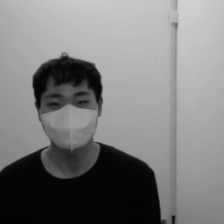

In [2]:
# 이미지를 가져 와서 흑백으로 변환
# convert -> L : 흑백, RGB : 컬러

img = Image.open("DataFiles/Class 2-samples/0.jpg").convert('L')
img

In [3]:
# numpy 배열로 이미지 데이터를 변환
# (기계가 인식할 수 있도록  이미지 데이터를 숫자 데이터로 변환시켜줘야함)
# -> 가로(행), 세로(열), 픽셀수로 변경
# 손글씨, 패션데이터는 keras에서 제공하는 학습용 이미지 데이터이기 때문에 사전에 다 수치 데이터로 변환되어 있음

img_array = np.array(img)

In [4]:
img_array.shape

(224, 224)

In [5]:
img_array

array([[178, 179, 180, ..., 195, 195, 195],
       [178, 179, 179, ..., 194, 194, 194],
       [177, 178, 178, ..., 194, 194, 193],
       ...,
       [  3,   3,   3, ..., 129, 129, 129],
       [  3,   3,   3, ..., 128, 128, 129],
       [  3,   3,   3, ..., 128, 128, 128]], dtype=uint8)

In [6]:
# 반복문 실행시 어느정도 실행되고 있는지 %로 알려주는 모듈
!pip install tqdm
from tqdm import tqdm

In [7]:
# 데이터 셋 구성하기
class1_list = [] # 준회씨 데이터가 저장될 자리
class2_list = [] # 동일씨 데이터가 저장될 자리

for i in tqdm(range(0,200,1)) :
    # 1. 준회씨  데이터 작업
    # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후 img1 변수에 담기
    img1 = Image.open("DataFiles/Class 1-samples/" + str(i) + ".jpg").convert('L')
    # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
    img_array1 = np.array(img1)
    # numpy배열 데이터를 빈 리스트 하나씩 추가해주기
    class1_list.append(img_array1)
    
    # 2. 동일씨 데이터 작업
    # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후 img1 변수에 담기
    img2 = Image.open("DataFiles/Class 2-samples/" + str(i) + ".jpg").convert('L')
    # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
    img_array2 = np.array(img2)
    # numpy배열 데이터를 빈 리스트 하나씩 추가해주기
    class2_list.append(img_array2)
    

100%|██████████| 200/200 [00:00<00:00, 719.43it/s]


In [8]:
class1_list

[array([[186, 186, 186, ..., 205, 205, 205],
        [186, 186, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 204, 204, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]], dtype=uint8),
 array([[185, 186, 187, ..., 205, 205, 205],
        [185, 186, 187, ..., 204, 204, 203],
        [186, 186, 187, ..., 204, 203, 203],
        ...,
        [  5,   5,   5, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]], dtype=uint8),
 array([[186, 186, 187, ..., 205, 204, 204],
        [185, 186, 187, ..., 204, 204, 203],
        [185, 186, 186, ..., 204, 203, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 139, 139]], dtype=uint8),
 array([[188, 188, 188, ..., 206, 205, 205],
        [186, 187, 187, ..., 205, 204, 204],
        [185, 18

In [9]:
# 리스트 자체도 numpy 배열로 변환
# 사진 하나하나도 numpy 배열로, 이를 담은 리스트도 numpy배열로 변환시켜줘야함


class1_numpy = np.array(class1_list)
class2_numpy = np.array(class2_list)

# concatenate : 두 배열(이미지 데이터)을 순서대로 붙이기(문제 데이터 생성)
data = np.concatenate((class1_numpy, class2_numpy))

In [10]:
class1_numpy

array([[[186, 186, 186, ..., 205, 205, 205],
        [186, 186, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 204, 204, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]],

       [[185, 186, 187, ..., 205, 205, 205],
        [185, 186, 187, ..., 204, 204, 203],
        [186, 186, 187, ..., 204, 203, 203],
        ...,
        [  5,   5,   5, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]],

       [[186, 186, 187, ..., 205, 204, 204],
        [185, 186, 187, ..., 204, 204, 203],
        [185, 186, 186, ..., 204, 203, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 139, 139]],

       ...,

       [[185, 185, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 205, 204, 204

In [11]:
len(class1_list)

200

In [12]:
class1_numpy.shape

(200, 224, 224)

In [13]:
# 문제 데이터 생성 후 형태 확인
data.shape
# 준회씨 데이터 200개 + 동일씨 데이ㅓ 200개가 순서대로 data라는 변수에 담겨져 있음

(400, 224, 224)

In [14]:
len(class1_list[0])

224

In [15]:
class1_numpy

array([[[186, 186, 186, ..., 205, 205, 205],
        [186, 186, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 204, 204, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]],

       [[185, 186, 187, ..., 205, 205, 205],
        [185, 186, 187, ..., 204, 204, 203],
        [186, 186, 187, ..., 204, 203, 203],
        ...,
        [  5,   5,   5, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140],
        [  4,   4,   4, ..., 139, 140, 140]],

       [[186, 186, 187, ..., 205, 204, 204],
        [185, 186, 187, ..., 204, 204, 203],
        [185, 186, 186, ..., 204, 203, 203],
        ...,
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 140, 140, 140],
        [  4,   4,   4, ..., 139, 139, 139]],

       ...,

       [[185, 185, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 205, 204, 204],
        [186, 186, 186, ..., 205, 204, 204

In [16]:
a=np.array(class1_list)

In [17]:
a[0]

array([[186, 186, 186, ..., 205, 205, 205],
       [186, 186, 186, ..., 205, 204, 204],
       [186, 186, 186, ..., 204, 204, 203],
       ...,
       [  4,   4,   4, ..., 140, 140, 140],
       [  4,   4,   4, ..., 140, 140, 140],
       [  4,   4,   4, ..., 139, 140, 140]], dtype=uint8)

In [18]:
# 정답 데이(터 만들기(문제와 정답의 순서를 일정하게 맞춰야 됨)
# 0 : 준회씨 데이터 정답, 1 : 동일씨 데이터의 정답
target = np.array([0]*200 + [1]*200)
target.shape

(400,)

# 준회씨, 동일씨 이미지를 분류하는 신경망 모델 만들기 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [20]:
# 랜덤 샘플링(train, test분리)
X_train, X_test, y_train,y_test = train_test_split(data,target,test_size=0.2)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 224, 224), (80, 224, 224), (320,), (80,))

In [22]:
# 신경망 구조 설계
model = Sequential()
model.add(Flatten(input_shape=(224,224)))

model.add(Dense(400, activation = 'relu'))  # 최근에 가장 많이 사용되는 relu함수를 사용 
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))   # 출력층은 항상 문제에 따라서 활성화 함수가 정해져 있음


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 400)               20070800  
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 20,176,201
Trainable params: 20,176,201
Non-trainable params: 0
____________________________________________

In [24]:
# 학습/평가 방법 설정
model.compile(loss='binary_crossentropy',
             optimizer = 'Adam',
             metrics=['acc']
             )

In [30]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [94]:
h1 = model.fit(X_train, y_train,
              validation_split=0.2,
               epochs=100
              )
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬되있는 데이터에는 사용 불가


Train on 256 samples, validate on 64 samples
Epoch 1/100
256/256 [==============================] - 0s 2ms/sample - loss: 2131.4486 - acc: 0.4883 - val_loss: 4700.5732 - val_acc: 0.5156
Epoch 2/100
256/256 [==============================] - 0s 228us/sample - loss: 3131.6685 - acc: 0.5742 - val_loss: 1438.7020 - val_acc: 0.4844
Epoch 3/100
256/256 [==============================] - 0s 240us/sample - loss: 756.2581 - acc: 0.5898 - val_loss: 493.9192 - val_acc: 0.5625
Epoch 4/100
256/256 [==============================] - 0s 237us/sample - loss: 160.3605 - acc: 0.7852 - val_loss: 1.5058e-32 - val_acc: 1.0000
Epoch 5/100
256/256 [==============================] - 0s 230us/sample - loss: 7.6468 - acc: 0.9453 - val_loss: 9.9160e-08 - val_acc: 1.0000
Epoch 6/100
256/256 [==============================] - 0s 223us/sample - loss: 0.7291 - acc: 0.9883 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/100
256/256 [==============================] - 0s 215us/sample - loss: 0.0520 - acc: 0.9961 - val

256/256 [==============================] - 0s 207us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 58/100
256/256 [==============================] - 0s 207us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 59/100
256/256 [==============================] - 0s 200us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 60/100
256/256 [==============================] - 0s 195us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 61/100
256/256 [==============================] - 0s 199us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 62/100
256/256 [==============================] - 0s 199us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 63/100
256/256 [==============================] - 0s 199us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc

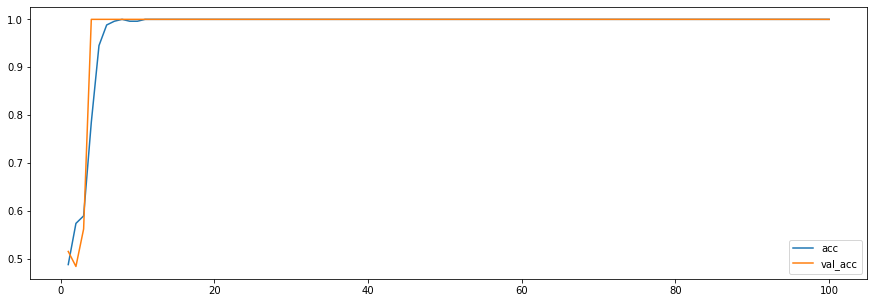

In [97]:
plt.figure(figsize=(15,5))

plt.plot(range(1,101),
        h1.history['acc'],
        label = 'acc'
        )

plt.plot(range(1,101),
        h1.history['val_acc'],
        label = 'val_acc'
        )
plt.legend()
plt.show()